In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [7]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [8]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [9]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
le = LabelEncoder()
columns = ['sex','smoker','region']
for column in columns:
    df[column] = le.fit_transform(df[column])

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [12]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

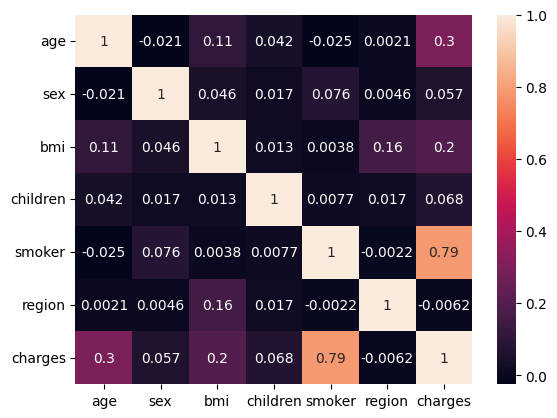

In [13]:
sns.heatmap(df.corr(),annot=True)

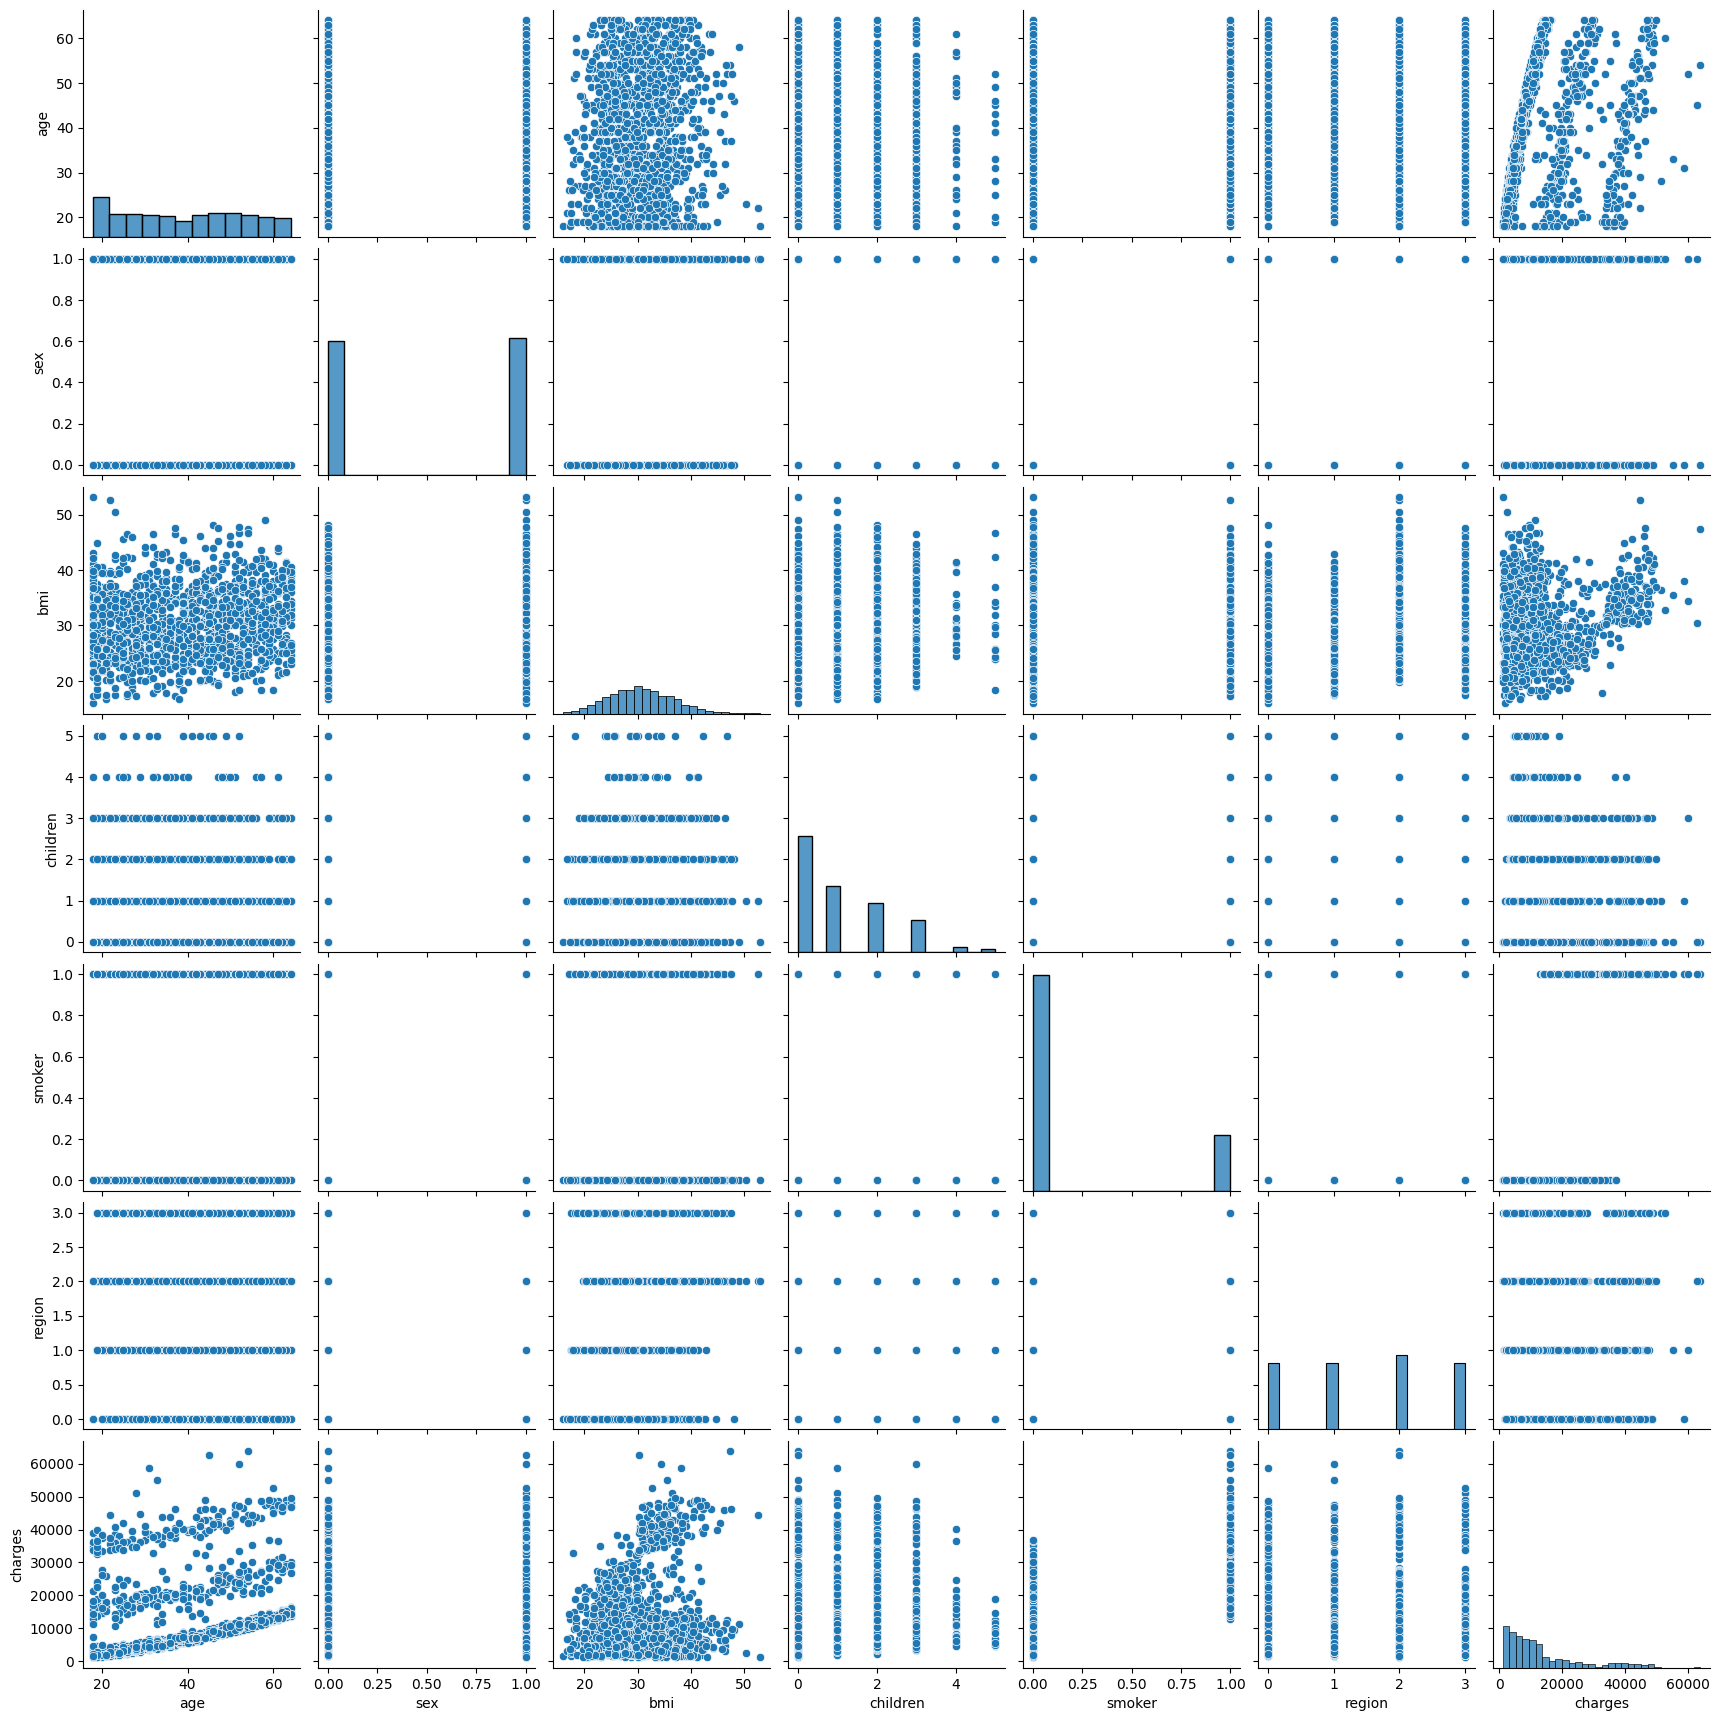

In [14]:
sns.pairplot(df)

C:\Users\YUGANDHAR\AppData\Local\Temp\ipykernel_34508\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

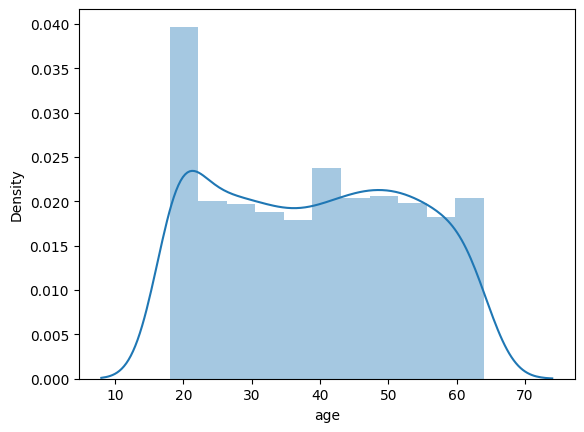

In [15]:
sns.distplot(df['age'])

C:\Users\YUGANDHAR\AppData\Local\Temp\ipykernel_34508\4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

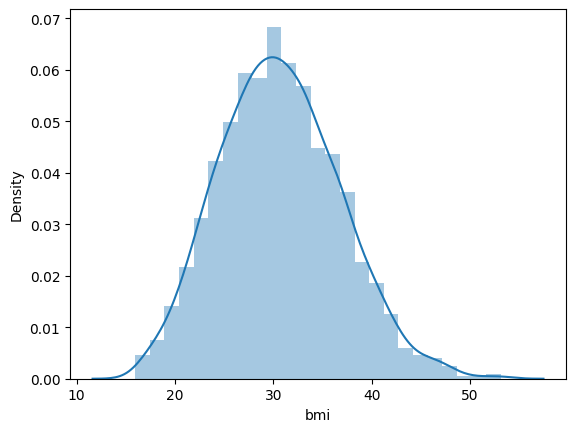

In [16]:
sns.distplot(df['bmi'])

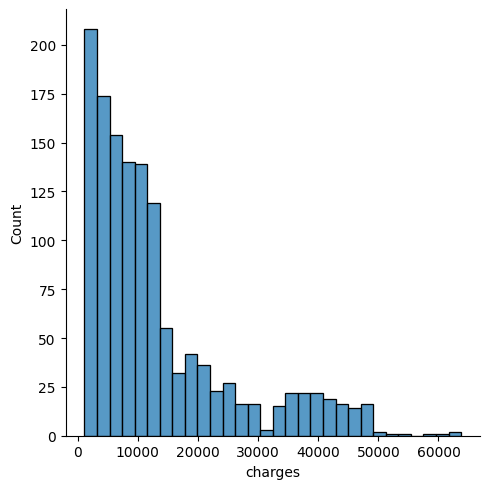

In [17]:
sns.displot(df['charges'])

<Axes: >

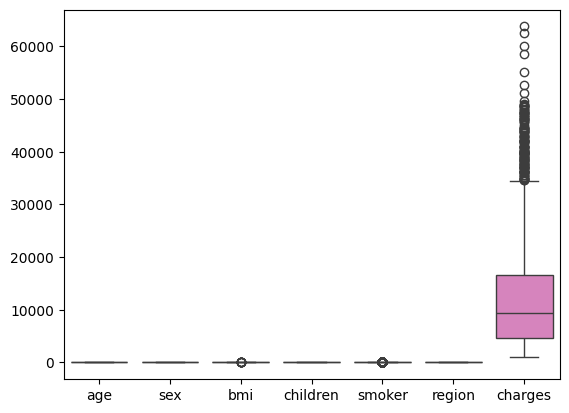

In [18]:
sns.boxplot(df)

In [19]:
df['age_bmi'] = df['age'] * df['bmi']
df['bmi_squared'] = df['bmi'] ** 2
df['age_smoker'] = df['age'] * df['smoker']
df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_bmi_smoker'] = df['age'] * df['bmi'] * df['smoker']


In [20]:
x = df.drop('charges',axis=1)
y = df['charges']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
df

,age,sex,bmi,children,smoker,region,charges,age_bmi,bmi_squared,age_smoker,bmi_smoker,age_bmi_smoker
0,19,0,27.900,0,1,3,16884.92400,530.100,778.410000,19,27.90,530.10
1,18,1,33.770,1,0,2,1725.55230,607.860,1140.412900,0,0.00,0.00
2,28,1,33.000,3,0,2,4449.46200,924.000,1089.000000,0,0.00,0.00
3,33,1,22.705,0,0,1,21984.47061,749.265,515.517025,0,0.00,0.00
4,32,1,28.880,0,0,1,3866.85520,924.160,834.054400,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1548.500,959.140900,0,0.00,0.00
1334,18,0,31.920,0,0,0,2205.98080,574.560,1018.886400,0,0.00,0.00
1335,18,0,36.850,0,0,2,1629.83350,663.300,1357.922500,0,0.00,0.00
1336,21,0,25.800,0,0,3,2007.94500,541.800,665.640000,0,0.00,0.00


In [23]:
sc = StandardScaler()
x_train[['age','bmi','age_bmi','bmi_squared','age_smoker','bmi_smoker','age_bmi_smoker']] =sc.fit_transform(x_train[['age','bmi','age_bmi','bmi_squared','age_smoker','bmi_smoker','age_bmi_smoker']])
x_test[['age','bmi','age_bmi','bmi_squared','age_smoker','bmi_smoker','age_bmi_smoker']] =sc.transform(x_test[['age','bmi','age_bmi','bmi_squared','age_smoker','bmi_smoker','age_bmi_smoker']])

sct = StandardScaler()

y_train= sct.fit_transform(y_train.values.reshape(-1,1))
y_test= sct.transform(y_test.values.reshape(-1,1))

In [24]:
x_train

,age,sex,bmi,children,smoker,region,age_bmi,bmi_squared,age_smoker,bmi_smoker,age_bmi_smoker
560,0.472227,0,-1.756525,2,0,1,-0.562736,-1.497631,-0.470101,-0.495987,-0.456235
1285,0.543313,0,-1.033082,0,0,0,-0.133051,-0.991482,-0.470101,-0.495987,-0.456235
1142,0.898745,0,-0.943687,0,0,2,0.152363,-0.922001,-0.470101,-0.495987,-0.456235
969,-0.025379,0,0.622393,5,0,2,0.239620,0.542715,-0.470101,-0.495987,-0.456235
486,1.040918,0,-1.504893,3,0,1,-0.101894,-1.332913,-0.470101,-0.495987,-0.456235
...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.518194,0,0.130717,4,0,0,-1.236610,0.032432,-0.470101,-0.495987,-0.456235
1130,-0.025379,0,-1.107579,5,0,2,-0.537509,-1.048218,-0.470101,-0.495987,-0.456235
1294,1.325264,1,-0.891539,0,0,0,0.471624,-0.880765,-0.470101,-0.495987,-0.456235
860,-0.167551,0,2.820864,2,1,3,1.045675,3.388979,1.760933,3.266389,2.902528


In [25]:
y_train

array([[-0.3456208 ],
       [-0.40048783],
       [ 1.14633152],
       ...,
       [-0.11777735],
       [ 2.72746075],
       [-0.26065271]])

In [26]:
x_test

,age,sex,bmi,children,smoker,region,age_bmi,bmi_squared,age_smoker,bmi_smoker,age_bmi_smoker
764,0.401140,0,-0.891539,2,0,0,-0.152434,-0.880765,-0.470101,-0.495987,-0.456235
887,-0.238638,0,-0.089461,0,0,1,-0.251885,-0.181115,-0.470101,-0.495987,-0.456235
890,1.751782,0,-0.608453,0,1,1,0.968334,-0.647856,3.388985,1.629044,2.825176
1293,0.472227,1,-0.797177,3,0,1,-0.054433,-0.804829,-0.470101,-0.495987,-0.456235
259,-1.447107,1,0.225079,0,1,1,-1.156180,0.126786,0.675565,2.027018,0.700376
...,...,...,...,...,...,...,...,...,...,...,...
109,1.680696,1,0.749865,0,1,2,1.902738,0.682545,3.328687,2.277580,3.759706
575,1.325264,0,-0.561272,0,0,1,0.692263,-0.607550,-0.470101,-0.495987,-0.456235
535,-0.096465,1,-0.419729,1,0,0,-0.281956,-0.484082,-0.470101,-0.495987,-0.456235
543,1.040918,0,2.789410,0,1,2,2.569118,3.341750,2.786003,3.251371,4.426176


In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(x_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

In [29]:
lr.score(x_train, y_train)


0.83553045508279

In [30]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


C:\Users\YUGANDHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [31]:
rf.score(x_test,y_test)

0.8731068663495654

In [32]:
y_pred = rf.predict(x_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [33]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
xgb.score(x_test,y_test)

0.8633423753355464

In [35]:
y_pred = xgb.predict(x_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

In [36]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)


C:\Users\YUGANDHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [37]:
svr.score(x_test,y_test)

0.8689678379223339

In [38]:
y_pred = lr.predict(x_test)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

In [39]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
model.fit(x_train, y_train)


C:\Users\YUGANDHAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

In [40]:
model.score(x_test,y_test)

0.8627947128533545

In [259]:
data = {
    'model':['Linear_regression','Random_Forest','XGBregressor','SVR'],
    'r2_score':[lr_r2,rf_r2,xgb_r2,svr_r2],
    'MSE':[lr_mse,rf_mse,xgb_mse,svr_mse],
    'MAE':[lr_mae,rf_mae,xgb_mae,svr_mae],
    'RMSE':[lr_rmse,rf_rmse,xgb_rmse,svr_rmse]
}
df = pd.DataFrame(data)

In [260]:
df

,model,r2_score,MSE,MAE,RMSE
0,Linear_regression,0.868326,0.141632,0.228480,0.376341
1,Random_Forest,0.873107,0.136489,0.193756,0.369445
2,XGBregressor,0.863342,0.146992,0.204721,0.383396
3,SVR,0.868326,0.141632,0.228480,0.376341


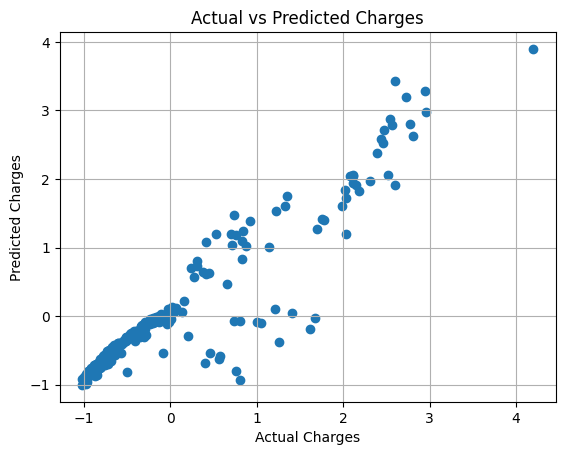

In [261]:
import matplotlib.pyplot as plt
y_pred = lr.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.show()


In [ ]:
19	0	27.900	0	1	3	16884.92400
18	male	33.770	1	no	southeast	1725.55230

In [51]:
# Sample new data: [age, sex, bmi, children, smoker, region, age_bmi, bmi_squared, age_smoker, bmi_smoker, age_bmi_smoker]
new_data = {
    'age': 19,
    'sex': 0,       # male=1, female=0 (after label encoding)
    'bmi': 27.900,
    'children': 0,
    'smoker': 1,    # smoker=1, non-smoker=0
    'region': 3,    # region encoded (e.g., southeast=2)
}

In [52]:
# Feature engineering on new input
new_data['age_bmi'] = new_data['age'] * new_data['bmi']
new_data['bmi_squared'] = new_data['bmi'] ** 2
new_data['age_smoker'] = new_data['age'] * new_data['smoker']
new_data['bmi_smoker'] = new_data['bmi'] * new_data['smoker']
new_data['age_bmi_smoker'] = new_data['age'] * new_data['bmi'] * new_data['smoker']


In [53]:
new_df = pd.DataFrame([new_data])
new_df

,age,sex,bmi,children,smoker,region,age_bmi,bmi_squared,age_smoker,bmi_smoker,age_bmi_smoker
0,19,0,27.9,0,1,3,530.1,778.41,19,27.9,530.1


In [54]:
new_df[['age','bmi','age_bmi','bmi_squared','age_smoker','bmi_smoker','age_bmi_smoker']] = sc.transform(new_df[['age','bmi','age_bmi','bmi_squared','age_smoker','bmi_smoker','age_bmi_smoker']])

In [55]:
# Predict
pred_scaled = rf.predict(new_df)
pred_actual = sct.inverse_transform(pred_scaled.reshape(-1, 1))

print(f"Predicted Insurance Cost: ₹{pred_actual[0][0]:.2f}")

Predicted Insurance Cost: ₹17096.25


In [50]:
import pickle

# Save models

pickle.dump(rf, open('random_forest.pkl', 'wb'))


# Save scalers
pickle.dump(sc, open('input_scaler.pkl', 'wb'))
pickle.dump(sct, open('output_scaler.pkl', 'wb'))
